In [1]:
## Monolayer Graphene

import numpy as np
from scipy import special
from scipy import integrate

def coulomb_potential(q):
    return 2 * np.pi / q  ## in units of (e^2 / k*l_0)

## Form Factor
def form_factor_0(q): ## for n = 0 Landau Level
    return special.eval_laguerre(0, q**2 / 2)

def form_factor_n(n, q): ## for nth Landau Level
    return (special.eval_laguerre(n, q**2 / 2) + special.eval_laguerre(n-1, q**2 / 2)) * 0.5

## Integrand
def integrand_0(q, m): ## for n = 0 Landau Level
    laguerre = special.eval_laguerre(m, q**2)
    form_f_0 = form_factor_0(q)
    return (q / 2*np.pi) * coulomb_potential(q) * (form_f_0)**2 * laguerre * np.exp(-q**2)

def integrand_n(q, m, n): ## for nth Landau Level
    laguerre = special.eval_laguerre(m, q**2)
    form_f_n = form_factor_n(n , q)
    return (q / 2*np.pi) * coulomb_potential(q) * (form_f_n)**2 * laguerre * np.exp(-q**2)

## Pseudopotential 
def calculate_pseudopotential_0(m):
    result_0, _ = integrate.quad(integrand_0, 0, np.inf, args=(m,))
    return result_0

def calculate_pseudopotential_n(n,m):
    result_n, _ = integrate.quad(integrand_n, 0, np.inf, args=(m,n))
    return result_n

# Calculate pseudopotentials for m = 0 to 5 and n=0 Landau Level
m_values = range(6)
pseudopotentials_0 = [calculate_pseudopotential_0(m) for m in m_values]

# Print results
print("For n = 0 Landau Level, The pseudopotentials V_m are as follows: ")
for m, V_m in zip(m_values, pseudopotentials_0):
    print(f"V_{m}_{0} = {V_m:.6f}")

# Calculate pseudopotentials for m = 0 to 5 and n=0 Landau Level
m_values = range(6)
n_values = np.array([1,2])

print("For nth Landau Level, The pseudopotentials V_m are as follows: ")
for n in n_values:
    for m in m_values:
        pseudopotentials_n = calculate_pseudopotential_n(n,m)
        print(f"V_{m}_{n} = {pseudopotentials_n:.6f}")

For n = 0 Landau Level, The pseudopotentials V_m are as follows: 
V_0_0 = 8.746709
V_1_0 = 4.373355
V_2_0 = 3.280016
V_3_0 = 2.733347
V_4_0 = 2.391678
V_5_0 = 2.152510
For nth Landau Level, The pseudopotentials V_m are as follows: 
V_0_1 = 6.970034
V_1_1 = 4.851690
V_2_1 = 3.707101
V_3_1 = 2.895639
V_4_1 = 2.486705
V_5_1 = 2.217107
V_0_2 = 5.383412
V_1_2 = 3.947337
V_2_2 = 3.889413
V_3_2 = 3.415215
V_4_2 = 2.875002
V_5_2 = 2.408887


In [2]:
## GaAs

def form_factor_GaAs(n, q):
    return special.eval_laguerre(n, q**2 / 2)

def integrand_GaAs(q, m, n):
    laguerre = special.eval_laguerre(m, q**2)
    form_f_GaAs = form_factor_GaAs(n, q)
    return (q / 2*np.pi) * coulomb_potential(q) * form_f_GaAs**2 * laguerre * np.exp(-q**2)

def calculate_pseudopotential_GaAs(n,m):
    result, _ = integrate.quad(integrand_GaAs, 0, np.inf, args=(n,m))
    return result

# Calculate pseudopotentials for m = 0 to 5 and n=0 Landau Level
m_values = range(6)
n_values = np.array([0,1,2])

print("For nth Landau Level, The pseudopotentials V_m are as follows: ")
for n in n_values:
    for m in m_values:
        pseudopotentials_GaAs = calculate_pseudopotential_GaAs(n,m)
        print(f"V_{m}_{n} = {pseudopotentials_GaAs:.6f}")

For nth Landau Level, The pseudopotentials V_m are as follows: 
V_0_0 = 8.746709
V_1_0 = 6.013363
V_2_0 = 4.996899
V_3_0 = 4.413394
V_4_0 = 4.018492
V_5_0 = 3.726557
V_0_1 = 4.373355
V_1_1 = 4.100020
V_2_1 = 3.557621
V_3_1 = 3.209280
V_4_1 = 2.961763
V_5_1 = 2.773381
V_0_2 = 3.280016
V_1_2 = 4.441688
V_2_2 = 3.684679
V_3_2 = 3.282218
V_4_2 = 3.011126
V_5_2 = 2.809872


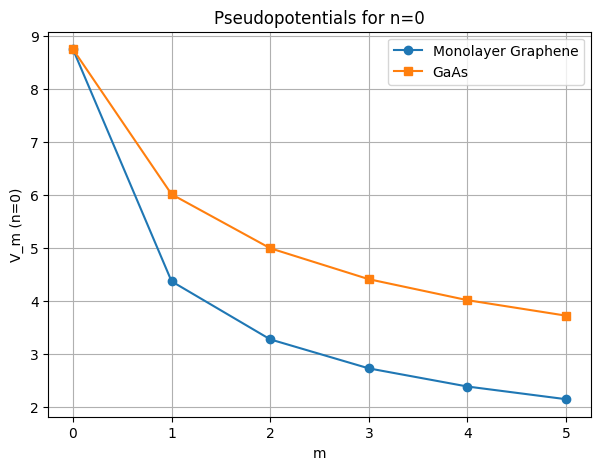

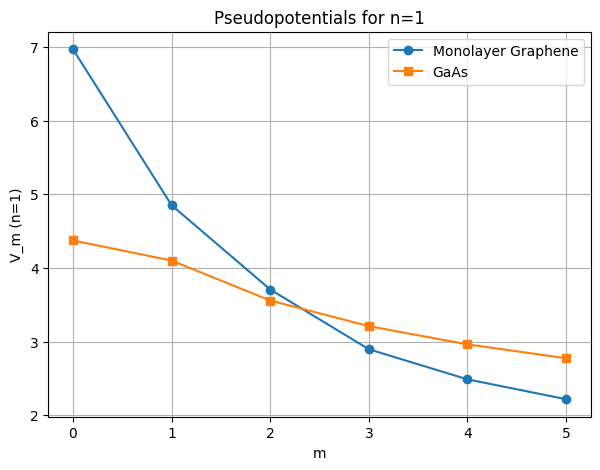

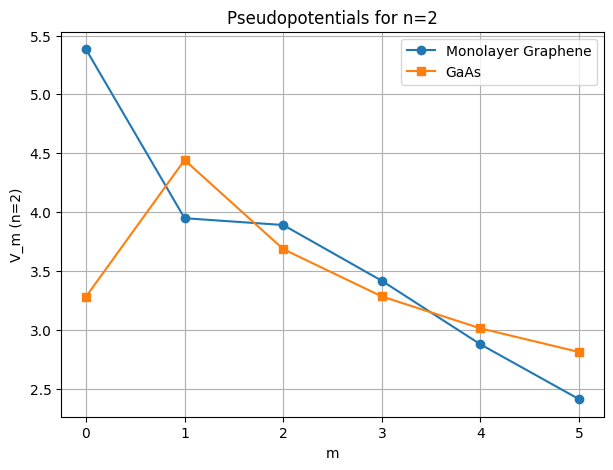

In [3]:
import matplotlib.pyplot as plt
# Given m values
m_values = np.arange(6)

# Placeholder pseudopotentials (Replace with actual values from notebook execution)
pseudopotentials_MG = {
    0: [8.746709, 4.373355, 3.280016, 2.733347, 2.391678, 2.152510],  # n=0 for MG
    1: [6.970034, 4.851690, 3.707101, 2.895639, 2.486705, 2.217107],  # n=1 for MG
    2: [5.383412, 3.947337, 3.889413, 3.415215, 2.875002, 2.408887]  # n=2 for MG
}

pseudopotentials_GaAs = {
    0: [8.746709, 6.013363, 4.996899, 4.413394, 4.018492, 3.726557],  # n=0 for GaAs
    1: [4.373355, 4.100020, 3.557621, 3.209280, 2.961763, 2.773381],  # n=1 for GaAs
    2: [3.280016, 4.441688, 3.684679, 3.282218, 3.011126, 2.809872]  # n=2 for GaAs
}

# Plot pseudopotentials for each Landau level
for n in range(3):
    plt.figure(figsize=(7,5))
    plt.plot(m_values, pseudopotentials_MG[n], 'o-', label='Monolayer Graphene')
    plt.plot(m_values, pseudopotentials_GaAs[n], 's-', label='GaAs')
    plt.xlabel('m')
    plt.ylabel(f'V_m (n={n})')
    plt.title(f'Pseudopotentials for n={n}')
    plt.legend()
    plt.grid()
    plt.show()